## Early Stage Diabetes Risk Prediction (Classification Project)
Diabetes is a chronic health condition characterized by high levels of sugar (glucose) in the blood. Glucose is a vital source of energy for the body, and its levels are primarily regulated by insulin, a hormone produced by the pancreas. When the body fails to produce enough insulin or becomes resistant to its effects, it leads to an accumulation of glucose in the bloodstream, resulting in diabetes.

Identifying diabetes at early stage is very helpful for the prevention or treatments. Therefore, this analysis and machine leaning model will help the community to predict whether they have a chance for having diabetes in the future or not.

<div class="alert alert-success">
    <h4>Table of content</h4>
    <ol>
        <li><a href="#Project-goal">Project goals</a></li>
        <li><a href="#Data-source">Data source</a></li>
        <li><a href="#Technology-and-tools">Technology and tools</a></li>
        <li><a href="#Dataset-feature-description">Data set feature description</a></li>
        <li><a href="#Load-dataset">Load dataset</a></li>
        <li><a href="#Initial-analysis">Initial analysis</a></li>
        <li>
            <a href="#Exploratory-Data-Analysis-(EDA)">Exploratory Data Analysis (EDA)</a>
            <ol>
                <li>
                    <a href="#Univariate-analysis">Univariate analysis</a>
                    <ol>
                        <li><a href="#Age-vs-the-Risk-of-Diabetes">Age vs the Risk of Diabetes</a></li>
                        <li><a href="#Gender-vs-the-Risk-of-Diabetes">Gender vs the Risk of Diabetes</a></li>
                        <li><a href="#Sudden-weight-loss-vs-diabetes">Sudden weight loss vs diabetes</a></li>
                        <li><a href="#Delayed-healing-vs-Diabetes">Delayed healing vs Diabetes</a></li>
                        <li><a href="#Obesity-vs-Risk-of-diabetes">Obesity vs Risk of diabetes</a></li>
                    </ol>
                </li>
            </ol>
        </li>
        <li><a href="#Encode-string-labels-to-numeric-values">Encode string labels to numeric values</a></li>
        <li><a href="#Model-development">Model development</a></li>
        <li><a href="#Save-the-model">Save the model</a></li>
    </ol>
</div>

### Project goal
In this project I will be analyzing the dataset and derive some valuable insights. Then a classification model will be developed for early stage diabetes prediction.

### Data source
I have used [Early Stage Diabetes Risk Prediction Dataset](https://www.kaggle.com/datasets/ishandutta/early-stage-diabetes-risk-prediction-dataset) from Kaggle.

### Technology and tools
This is a classification problem. I have used following algorithms and tools for this project.
1. **Decision Tree Classifier** algorithm for this project.
2. LabelEncoder and OnehotEncorder
3. Pipeline
4. GridSearchCV for parameter tuning
5. Matplotlib and Seaborn as the graphing libraries

### Dataset feature description
- **Age (1-20 to 65)** : Age range of the individuals.
- **Sex (1. Male, 2. Female)** : Gender information.
- **Polyuria (1. Yes, 2. No)** : Presence of excessive urination.
- **Polydipsia (1. Yes, 2. No)** : Excessive thirst.
- **Sudden Weight Loss (1. Yes, 2. No)** : Abrupt weight loss.
- **Weakness (1. Yes, 2. No)** : Generalized weakness.
- **Polyphagia (1. Yes, 2. No)** : Excessive hunger.
- **Genital Thrush (1. Yes, 2. No)** : Presence of genital thrush.
- **Visual Blurring (1. Yes, 2. No)** : Blurring of vision.
- **Itching (1. Yes, 2. No)** : Presence of itching.
- **Irritability (1. Yes, 2. No)** : Display of irritability.
- **Delayed Healing (1. Yes, 2. No)** : Delayed wound healing.
- **Partial Paresis (1. Yes, 2. No)** : Partial loss of voluntary movement.
- **Muscle Stiffness (1. Yes, 2. No)** : Presence of muscle stiffness.
- **Alopecia (1. Yes, 2. No)** : Hair loss.
- **Obesity (1. Yes, 2. No)** : Presence of obesity.
- **Class (1. Positive, 2. Negative)** : Diabetes classification.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load dataset

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [3]:
df['Age'].max()

90

## Initial analysis

In [4]:
df.shape

(520, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [6]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [7]:
df.duplicated().value_counts()

True     269
False    251
dtype: int64

<div class="alert alert-info">
    <h4>Observations:</h4>
    <ul>
        <li>Dataset consists of 520 observations and 16 independent variables and the output class column.</li>
        <li>Most of the features and the class/output column are in Text format.</li>
        <li>There are no missing or null values present.</li>
    </ul>
</div>

## Exploratory Data Analysis (EDA)

### Univariate analysis
Here I will be considering few important features and perform univariate analysis to see how each individual variable relates to the output class variable.
#### Age vs the Risk of Diabetes

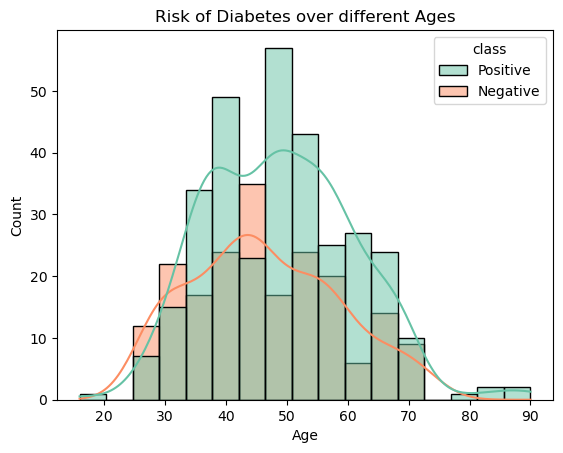

In [42]:
plt.title('Risk of Diabetes over different Ages')
sns.histplot(data=df, x='Age', hue='class', kde=True, palette='Set2')
plt.show()

<div class="alert alert-info">
    <h4>Observations</h4>
    <ul>
        <li>The majority of data in the data set has been collected from the people in the Age betweem 30 and 70 years old.</li>
        <li>The data contribution from the age below 25 years and above 70 years is very low.</li>
        <li>People in ages between 40 and 55 has the major risk of diabetes.</li>
    </ul>    
</div>

#### Gender vs the Risk of Diabetes

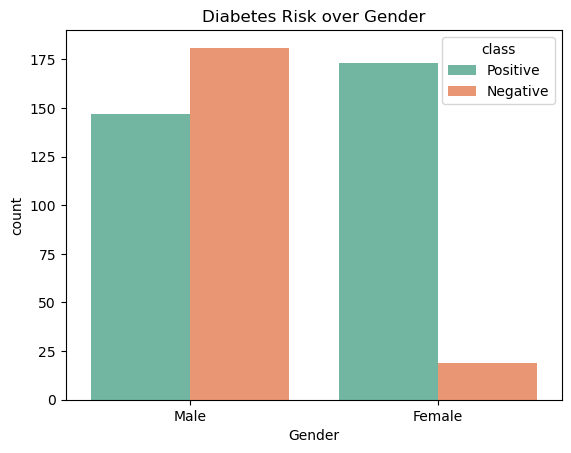

In [37]:
plt.title('Diabetes Risk over Gender')
sns.countplot(data=df, x='Gender', hue='class', palette='Set2')
plt.show()

<div class="alert alert-info">
    <h4>Observations</h4>
    <ul>
        <li>The majority of data in the data set is related to Male persons.</li>
        <li>The risk of diabetes is greater in Female persons.</li>
    </ul>    
</div>

#### Sudden weight loss vs diabetes

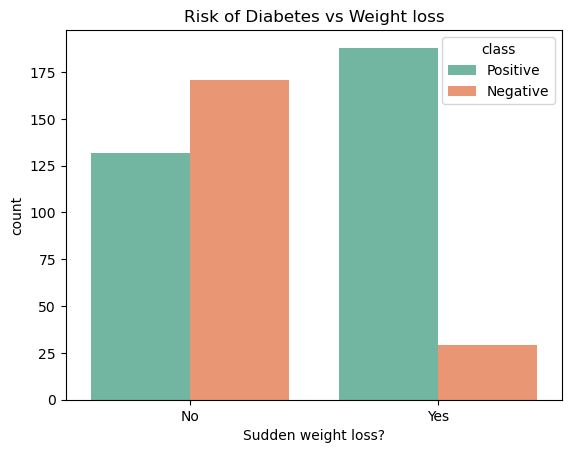

In [43]:
plt.title('Risk of Diabetes vs Weight loss')
sns.countplot(data=df, x='sudden weight loss', hue='class', palette='Set2')
plt.xlabel('Sudden weight loss?')
plt.show()

<div class="alert alert-info">
    <h4>Observations</h4>
    <ul>
        <li>Weight loss can be a some what strong symptom of Diabetes.</li>
        <li>Even though you do not experience sudden weight loss, still there is a significant change of having diabetes.</li>
    </ul>    
</div>

#### Delayed healing vs Diabetes
Delayed healing is a common condition among the people who are suffering from diabetes. Let's see if you have delayed healing, how strongly can we say that you will have a risk of diabetes.

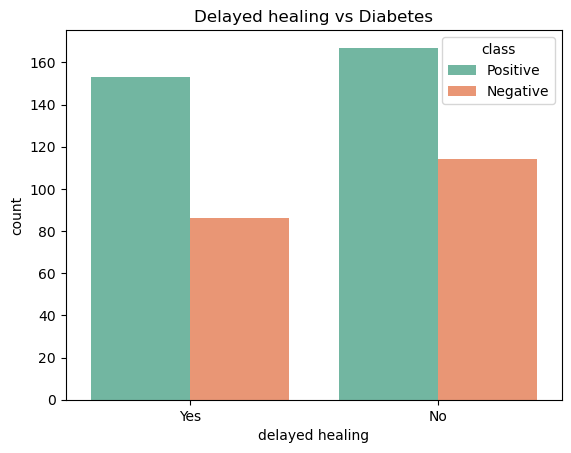

In [47]:
plt.title('Delayed healing vs Diabetes')
sns.countplot(data=df, x='delayed healing', hue='class', palette='Set2')
plt.show()

<div class="alert alert-info">
    <h4>Observations</h4>
    <ul>
        <li>Surprisingly, according to above graph, delayed healing is not a strong symptom to determine the risk of diabetes.</li>
        <li>The graph even shows that people who do not have delayed healing, have more risk of diabetes than others.</li>
    </ul>    
</div>

#### Obesity vs Risk of diabetes
Obesity is also a common condition among the people who are suffering from diabetes. Let's see how obesity relates to diabetes. 

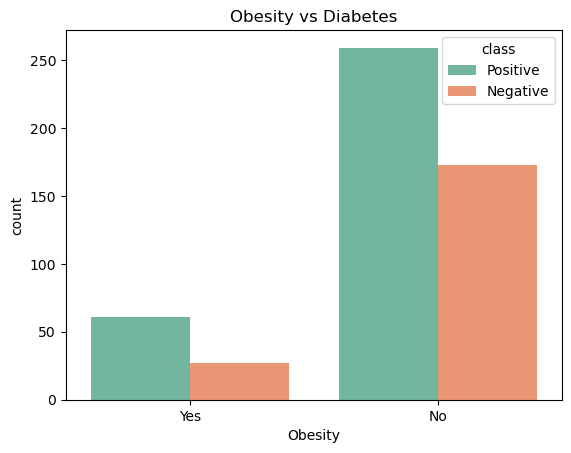

In [49]:
plt.title('Obesity vs Diabetes')
sns.countplot(data=df, x='Obesity', hue='class', palette='Set2')
plt.show()

<div class="alert alert-info">
    <h4>Observations</h4>
    <ul>
        <li>Surprisingly, according to above graph, delayed healing is not a strong symptom to determine the risk of diabetes.</li>
        <li>The graph even shows that people who do not have delayed healing, have more risk of diabetes than others.</li>
    </ul>    
</div>

## Encode string labels to numeric values
To apply ML algorithms we must convert string values to numeric values.

In [31]:
X_ = df.drop('class', axis=1)
y_ = df['class']

In [32]:
oh_encoder = OneHotEncoder(handle_unknown='ignore')

oh_encoder.fit(X_.drop('Age', axis=1))
oh_encoded_feature_names = oh_encoder.get_feature_names_out()
encoded_values = oh_encoder.transform(X_.drop('Age', axis=1)).toarray()

In [33]:
encoded_values

array([[0., 1., 1., ..., 1., 0., 1.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.]])

In [34]:
encoded_df = pd.DataFrame(encoded_values, columns=oh_encoded_feature_names)
encoded_df

,Gender_Female,Gender_Male,Polyuria_No,Polyuria_Yes,Polydipsia_No,Polydipsia_Yes,sudden weight loss_No,sudden weight loss_Yes,weakness_No,weakness_Yes,...,delayed healing_No,delayed healing_Yes,partial paresis_No,partial paresis_Yes,muscle stiffness_No,muscle stiffness_Yes,Alopecia_No,Alopecia_Yes,Obesity_No,Obesity_Yes
0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
516,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
517,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
518,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [44]:
label_endocer = LabelEncoder()
encoded_y = label_endocer.fit_transform(y_)
y = pd.DataFrame(encoded_y, columns=['class'])
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
515,1
516,1
517,1
518,0


In [48]:
X = X_[['Age']].join(encoded_df)
X

,Age,Gender_Female,Gender_Male,Polyuria_No,Polyuria_Yes,Polydipsia_No,Polydipsia_Yes,sudden weight loss_No,sudden weight loss_Yes,weakness_No,...,delayed healing_No,delayed healing_Yes,partial paresis_No,partial paresis_Yes,muscle stiffness_No,muscle stiffness_Yes,Alopecia_No,Alopecia_Yes,Obesity_No,Obesity_Yes
0,40,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,58,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,41,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,45,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,60,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
516,48,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
517,58,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
518,32,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


<div class="alert alert-success">Now we have <b>X</b> and <b>y</b> ready to be applied on ML algorithms.</div>

## Model development

In [51]:
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

In [55]:
pipe = Pipeline(steps=[('dt', DecisionTreeClassifier())])
pipe.get_params()

{'memory': None,
 'steps': [('dt', DecisionTreeClassifier())],
 'verbose': False,
 'dt': DecisionTreeClassifier(),
 'dt__ccp_alpha': 0.0,
 'dt__class_weight': None,
 'dt__criterion': 'gini',
 'dt__max_depth': None,
 'dt__max_features': None,
 'dt__max_leaf_nodes': None,
 'dt__min_impurity_decrease': 0.0,
 'dt__min_samples_leaf': 1,
 'dt__min_samples_split': 2,
 'dt__min_weight_fraction_leaf': 0.0,
 'dt__random_state': None,
 'dt__splitter': 'best'}

In [67]:
pipe_params = {
    'dt__criterion': ["gini", "entropy", "log_loss"],
    'dt__splitter': ["best", "random"],
    'dt__max_depth': [7, 9, 11]
}

In [68]:
gcv = GridSearchCV(estimator=pipe, param_grid=pipe_params, cv=cv)
gcv.fit(X, y)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None),
             estimator=Pipeline(steps=[('dt', DecisionTreeClassifier())]),
             param_grid={'dt__criterion': ['gini', 'entropy', 'log_loss'],
                         'dt__max_depth': [7, 9, 11],
                         'dt__splitter': ['best', 'random']})

In [69]:
gcv.best_score_

0.976923076923077

In [70]:
gcv.best_params_

{'dt__criterion': 'gini', 'dt__max_depth': 7, 'dt__splitter': 'best'}

In [78]:
gcv.best_estimator_

Pipeline(steps=[('dt', DecisionTreeClassifier(max_depth=7))])

## Save the model

In [72]:
model_file = 'models/diabetes_DT_model.pkl'
with open(model_file, 'wb') as file:
    pickle.dump(gcv.best_estimator_, file)